In [1]:
import os
os.chdir('../')

In [2]:
import seml
import pandas as pd
import numpy as np
#from run_seml import run
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 150)

/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale/lib/python3.8/site-packages/seml/database.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
from notebooks import mpl_latex
matplotlib.rcParams['axes.unicode_minus'] = False

/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [4]:
mpl_latex.enable_production_mode()

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

In [7]:
df_experiments = seml.get_results('kdd21_rgnn_at_scale_local_attack',
                                  to_data_frame=True,
                                  fields=['batch_id', 'slurm', 'config', 'result'])

/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale/lib/python3.8/site-packages/seml/evaluation.py:48: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [8]:
df_experiments.columns

Index(['_id', 'batch_id', 'slurm.experiments_per_job',
       'slurm.sbatch_options.gres', 'slurm.sbatch_options.mem',
       'slurm.sbatch_options.cpus-per-task', 'slurm.sbatch_options.time',
       'slurm.sbatch_options.nodes', 'slurm.sbatch_options.job-name',
       'slurm.sbatch_options.array', 'slurm.sbatch_options.output',
       'slurm.array_id', 'slurm.task_id', 'config.overwrite',
       'config.db_collection', 'config.dataset', 'config.attack',
       'config.attack_params.lr_factor',
       'config.attack_params.search_space_size',
       'config.attack_params.ppr_recalc_at_end',
       'config.attack_params.artifact_dir',
       'config.attack_params.model_storage_type',
       'config.attack_params.surrogate_model_params.label',
       'config.attack_params.surrogate_model_params.dataset',
       'config.attack_params.surrogate_model_params.binary_attr',
       'config.attack_params.surrogate_model_params.seed', 'config.nodes',
       'config.epsilons', 'config.binary_attr

In [9]:
latest_filter_columns = ['config.dataset', 'config.attack', 'config.model_label']

batch_ids = df_experiments.groupby(latest_filter_columns).batch_id.max().unique()

batch_ids

array([22, 23, 28, 21, 24, 29, 14, 19, 33, 40])

In [10]:
df_experiments = df_experiments[df_experiments.batch_id.isin(batch_ids)].copy()

df_experiments

,_id,batch_id,slurm.experiments_per_job,slurm.sbatch_options.gres,slurm.sbatch_options.mem,slurm.sbatch_options.cpus-per-task,slurm.sbatch_options.time,slurm.sbatch_options.nodes,slurm.sbatch_options.job-name,slurm.sbatch_options.array,slurm.sbatch_options.output,slurm.array_id,slurm.task_id,config.overwrite,config.db_collection,config.dataset,config.attack,config.attack_params.lr_factor,config.attack_params.search_space_size,config.attack_params.ppr_recalc_at_end,config.attack_params.artifact_dir,config.attack_params.model_storage_type,config.attack_params.surrogate_model_params.label,config.attack_params.surrogate_model_params.dataset,config.attack_params.surrogate_model_params.binary_attr,config.attack_params.surrogate_model_params.seed,config.nodes,config.epsilons,config.binary_attr,config.seed,config.artifact_dir,config.model_storage_type,config.device,config.display_steps,config.model_label,config.make_undirected,config.make_unweighted,config.data_dir,config.data_device,result.results,slurm.sbatch_options.qos,config.attack_params.epochs,config.attack_params.fine_tune_epochs
5,23,14,1,gpu:1,256G,4,1-00:00,1,kdd21_rgnn_at_scale_local_attack_14,0-2,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6299363.0,2.0,23,kdd21_rgnn_at_scale_local_attack,ogbn-papers100M,LocalPRBCD,0.1,20000,False,cache_debug,nettack,Linear GCN,cora_ml,False,0,"[105811597, 109578061, 106634777, 110374959, 1...","[0.5, 1]",False,0,cache,pretrained,0,20,Soft Median PPRGo (T=1.0),False,True,./datasets,cpu,"[{'label': 'Soft Median PPRGo (T=1.0)', 'epsil...",interactive,100.0,NaN
131,158,19,1,gpu:1,190G,4,1-00:00,1,kdd21_rgnn_at_scale_local_attack_19,0-4,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6301133.0,0.0,158,kdd21_rgnn_at_scale_local_attack,ogbn-papers100M,LocalPRBCD,0.1,20000,False,cache_debug,nettack,Linear GCN,cora_ml,False,0,"[107359261, 103190822, 106330488, 110621594, 1...","[0.5, 1]",False,0,cache,pretrained,0,20,Soft Median RPPRGo (T=5.0),False,True,./datasets,cpu,"[{'label': 'Soft Median RPPRGo (T=5.0)', 'epsi...",NaN,150.0,50.0
132,159,19,1,gpu:1,190G,4,1-00:00,1,kdd21_rgnn_at_scale_local_attack_19,0-4,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6301133.0,1.0,159,kdd21_rgnn_at_scale_local_attack,ogbn-papers100M,LocalPRBCD,0.1,20000,False,cache_debug,nettack,Linear GCN,cora_ml,False,0,"[105811597, 109578061, 106634777, 110374959, 1...","[0.5, 1]",False,0,cache,pretrained,0,20,Soft Median RPPRGo (T=5.0),False,True,./datasets,cpu,"[{'label': 'Soft Median RPPRGo (T=5.0)', 'epsi...",NaN,150.0,50.0
133,160,19,1,gpu:1,190G,4,1-00:00,1,kdd21_rgnn_at_scale_local_attack_19,0-4,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6301133.0,2.0,160,kdd21_rgnn_at_scale_local_attack,ogbn-papers100M,LocalPRBCD,0.1,20000,False,cache_debug,nettack,Linear GCN,cora_ml,False,0,"[107550422, 106341589, 103729161, 105335000, 1...","[0.5, 1]",False,0,cache,pretrained,0,20,Soft Median RPPRGo (T=5.0),False,True,./datasets,cpu,"[{'label': 'Soft Median RPPRGo (T=5.0)', 'epsi...",NaN,150.0,50.0
134,161,19,1,gpu:1,190G,4,1-00:00,1,kdd21_rgnn_at_scale_local_attack_19,0-4,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6301133.0,3.0,161,kdd21_rgnn_at_scale_local_attack,ogbn-papers100M,LocalPRBCD,0.1,20000,False,cache_debug,nettack,Linear GCN,cora_ml,False,0,"[109289689, 106005964, 104596150, 109538130, 1...","[0.5, 1]",False,0,cache,pretrained,0,20,Soft Median RPPRGo (T=5.0),False,True,./datasets,cpu,"[{'label': 'Soft Median RPPRGo (T=5.0)', 'epsi...",NaN,150.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,811,40,1,gpu:1,32G,4,0-06:00,1,kdd21_rgnn_at_scale_local_attack_40,0-59,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6303143.0,55.0,811,kdd21_rgnn_at_scale_local_attack,ogbn-products,LocalPRBCD,0.1,20000,False,cache_debug,nettack,Linear GCN,cora_ml,False,0,"[1419425, 1938806, 1445959, 2182313, 2081913]","[0.5, 0.75

In [11]:
df_evaluate = seml.get_results('kdd21_rgnn_at_scale_local_attack_evaluate',
                                  to_data_frame=True,
                                  fields=['batch_id', 'slurm', 'config', 'result'])

/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale/lib/python3.8/site-packages/seml/evaluation.py:48: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [12]:
df_results = [
    pd.DataFrame(r) 
    for r in df_experiments['result.results']
]

In [13]:
len(df_results)

326

In [14]:
for df_result, (_, df_experiment) in zip(df_results, df_experiments.iterrows()):
    df_result['dataset'] = df_experiment['config.dataset']
    df_result['attack'] = df_experiment['config.attack']
    df_result['seed'] = df_experiment['config.seed']
    df_result['batch_id'] = df_experiment['batch_id']
    df_result['original_id'] = df_experiment['_id']
    df_result['make_undirected'] = df_experiment['config.make_undirected']

df_results = pd.concat(df_results, ignore_index=True)
df_results = df_results.sort_values('batch_id')
# df_results = df_results.drop_duplicates([
#     c for c in df_results.columns if c != 'batch_id' and c != 'accuracy'
# ], keep='last')

df_results

,label,epsilon,n_perturbations,degree,logits,initial_logits,larget,node_id,perturbed_edges,logit_target,logit_best_non_target,confidence_target,confidence_non_target,margin,initial_logit_target,initial_logit_best_non_target,initial_confidence_target,initial_confidence_non_target,initial_margin,dataset,attack,seed,batch_id,original_id,make_undirected
0,Soft Median PPRGo (T=1.0),0.50,58,115,"[[tensor(-29.5579), tensor(-15.4154), tensor(-...","[[tensor(-11.1337), tensor(-6.9514), tensor(-7...",111.0,105811597,"[[391712, 7049720, 8627757, 9420937, 9879561, ...",-6.111015,-0.847259,2.218297e-03,0.428588,-0.426370,-4.201473e+00,-2.645411,0.014974,7.097618e-02,-0.056003,ogbn-papers100M,LocalPRBCD,0,14,23,False
19,Soft Median PPRGo (T=1.0),1.00,32,32,"[[tensor(-21.4106), tensor(-21.8104), tensor(-...","[[tensor(-9.9842), tensor(-7.8430), tensor(-7....",34.0,105728778,"[[4385483, 8680058, 9324856, 12063176, 1433663...",-16.999699,-0.082483,4.141186e-08,0.920827,-0.920827,-5.483672e+00,-3.005386,0.004154,4.951963e-02,-0.045366,ogbn-papers100M,LocalPRBCD,0,14,23,False
18,Soft Median PPRGo (T=1.0),0.50,16,32,"[[tensor(-14.8222), tensor(-17.5570), tensor(-...","[[tensor(-9.9842), tensor(-7.8430), tensor(-7....",34.0,105728778,"[[5737523, 10191422, 10442180, 12897859, 16007...",-14.222375,-0.157533,6.657345e-07,0.854248,-0.854248,-5.483672e+00,-3.005386,0.004154,4.951963e-02,-0.045366,ogbn-papers100M,LocalPRBCD,0,14,23,False
17,Soft Median PPRGo (T=1.0),1.00,70,70,"[[tensor(-24.5830), tensor(-24.9424), tensor(-...","[[tensor(-7.8605), tensor(-6.9660), tensor(-6....",40.0,108806354,"[[391712, 1232249, 2673053, 8627757, 9314013, ...",-20.828121,-0.022793,9.004548e-10,0.977465,-0.977465,-3.278218e+00,-2.748808,0.037695,6.400413e-02,-0.026309,ogbn-papers100M,LocalPRBCD,0,14,23,False
16,Soft Median PPRGo (T=1.0),0.50,35,70,"[[tensor(-18.4686), tensor(-17.6445), tensor(-...","[[tensor(-7.8605), tensor(-6.9660), tensor(-6....",40.0,108806354,"[[5737523, 8627757, 9256964, 9978402, 10133177...",-12.695442,-0.224213,3.065064e-06,0.799145,-0.799142,-3.278218e+00,-2.748808,0.037695,6.400413e-02,-0.026309,ogbn-papers100M,LocalPRBCD,0,14,23,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9000,Soft Median RPPRGo (T=5.0),0.50,2,5,"[[tensor(-40.0347), tensor(-40.1934), tensor(-...","[[tensor(-24.6797), tensor(-25.3636), tensor(-...",7.0,236004,"[[236004, 236004], [239832, 249906]]",-28.799917,0.000000,3.107097e-13,1.000000,-1.000000,-2.360316e-05,-10.674277,0.999976,2.313238e-05,0.999953,ogbn-products,LocalPRBCD,0,40,797,False
8999,Soft Median RPPRGo (T=5.0),1.00,10,10,"[[tensor(-22.6526), tensor(-23.1045), tensor(-...","[[tensor(-20.2841), tensor(-20.7394), tensor(-...",4.0,235985,"[[235985, 235985, 235985, 235985, 235985, 2359...",-0.064595,-2.771746,9.374472e-01,0.062553,0.874894,-9.536739e-07,-13.817477,0.999999,9.980353e-07,0.999998,ogbn-products,LocalPRBCD,0,40,796,False
8998,Soft Median RPPRGo (T=5.0),0.75,8,10,"[[tensor(-23.9398), tensor(-24.3489), tensor(-...","[[tensor(-20.2841), tensor(-20.7394), tensor(-...",4.0,235985,"[[235985, 235985, 235985, 235985, 235985, 2359...",-0.050970,-3.001898,9.503072e-01,0.049693,0.900615,-9.536739e-07,-13.817477,0.999999,9.980353e-07,0.999998,ogbn-products,LocalPRBCD,0,40,796,False
9008,Soft Median RPPRGo (T=5.0),1.00,5,5,"[[tensor(-14.0251), tensor(-13.1805), tensor(-...","[[tensor(-14.0251), tensor(-13.1805), tensor(-...",4.0,235989,[],-0.000025,-11.316053,9.999747e-01,0.000012,0.999963,-2.527205e-05,-11.316053,0.999975,1.217588e-05,0.999963,ogbn-products,LocalPRBCD,0,40,797,False


In [15]:
labels_to_plot = [
    'Soft Median RPPRGo (T=5.0)',
    'Soft Median RPPRGo (T=0.5)',
    'Vanilla PPRGo',
    'Vanilla GCN',
]

In [16]:
df_results.label.unique()

array(['Soft Median PPRGo (T=1.0)', 'Soft Median RPPRGo (T=5.0)',
       'Soft Median RPPRGo (T=0.5)', 'Soft Median RPPRGo (T=1.0)',
       'Soft Median RPPRGo (T=0.2)', 'Vanilla GCN', 'Vanilla PPRGo'],
      dtype=object)

In [17]:
dataset_map = {
    'cora_ml': r'\textbf{Cora ML}',#'~\citep{Bojchevski2018}}', # '\rotatebox{90}{Cora ML~\citep{Bojchevski2018}}',
    'citeseer': r'\textbf{Citeseer}',#~\citep{McCallum2000}}',
    'pubmed': r'\textbf{PubMed}',#~\citep{Sen2008}}',
    'ogbn-arxiv': r'\textbf{arXiv}',#~\citep{Hu2020}}',
    'ogbn-products': r'\textbf{Products}',#~\citep{Hu2020}}',
    'ogbn-papers100M': r'\textbf{Papers 100M}',#~\citep{Hu2020}}'
}
dataset_order = [dataset_map[k] for k in dataset_map.keys()]

In [18]:
attack_map = {
    'LocalPRBCD': r'Local PRBCD',
    'Nettack': r'Nettack'
}
attack_order = [attack_map[k] for k in attack_map.keys()]

In [19]:
def transform_label(label: str):
    return label.replace('RPPRGo (T=5.0)', 'PPRGo').replace('RPPRGo (T=0.5)', 'PPRGo')

In [20]:
def calc_mean_and_error(values: pd.Series, seeds: pd.Series = None, with_error=True, decimal_places: int = 3): 
    if seeds is not None:
        values, seeds = values.values, seeds.values
        seeds = seeds[~np.isnan(values)]
        values = values[~np.isnan(values)]

        idx = np.unique(seeds, return_index=True)[1]
        values = values[idx]
    
    if with_error:
        return rf'{np.mean(values):.{decimal_places}f} $\pm$ {np.std(values)/len(values):.{decimal_places}f}'
    else:
        return rf'{np.mean(values):.{decimal_places}f}'

In [29]:
architecture_c = r'Architecture'
dataset_c = r'   '
attack_c = r'Attack'
epsilons_c = r'Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$'
margin_c = r'Margin $\psi$'

In [22]:
nodes_for_each_budget = df_results[df_results.epsilon == 0.5].node_id.unique()

results = []

for (dataset, attack, label, epsilon), df_group in (
    df_results
        [df_results.label.isin(labels_to_plot)]
        .groupby(['dataset', 'attack', 'label', 'epsilon'])
):
    before_correct_rate = (df_group.initial_margin >= 0).mean()
    initial_margin = calc_mean_and_error(df_group.initial_margin, with_error=True)
    margin = calc_mean_and_error(df_group.margin, with_error=True)
    flip_rate = (
        df_group[(df_group.margin < 0) & (df_group.initial_margin > 0)].initial_margin.count()
        / df_group[df_group.initial_margin > 0].initial_margin.count()
    )

    confidence_target = calc_mean_and_error(df_group.confidence_target, with_error=False)
    confidence_non_target = calc_mean_and_error(df_group.confidence_non_target, with_error=False)
    initial_confidence_target = calc_mean_and_error(df_group.initial_confidence_target, with_error=False)
    initial_confidence_non_target = calc_mean_and_error(df_group.initial_confidence_non_target, with_error=False)

    results.append({
         dataset_c: dataset_map[dataset],
         architecture_c: transform_label(label),
         attack_c: attack_map[attack],
         epsilons_c: epsilon,
         'before_correct_rate': before_correct_rate,
         'initial_margin': initial_margin,
         'margin': margin,
         'flip_rate': flip_rate,
         'confidence_target': confidence_target,
         'confidence_non_target': confidence_non_target,
         'initial_confidence_target': initial_confidence_target,
         'initial_confidence_non_target': initial_confidence_non_target,
    })
    
df = pd.DataFrame(results)

df

,,Architecture,Attack,"Frac. edges $\epsilon$, $delta_i = \epsilon d_i$",before_correct_rate,initial_margin,margin,flip_rate,confidence_target,confidence_non_target,initial_confidence_target,initial_confidence_non_target
0,\textbf{Citeseer},Soft Median PPRGo,Local PRBCD,0.50,0.840000,0.495 $\pm$ 0.003,0.246 $\pm$ 0.003,0.174603,0.497,0.251,0.643,0.148
1,\textbf{Citeseer},Soft Median PPRGo,Local PRBCD,0.75,0.840000,0.495 $\pm$ 0.003,0.210 $\pm$ 0.003,0.222222,0.480,0.270,0.643,0.148
2,\textbf{Citeseer},Soft Median PPRGo,Local PRBCD,1.00,0.840000,0.495 $\pm$ 0.003,0.160 $\pm$ 0.003,0.261905,0.455,0.295,0.643,0.148
3,\textbf{Citeseer},Vanilla GCN,Local PRBCD,0.50,0.913333,0.565 $\pm$ 0.003,-0.401 $\pm$ 0.004,0.766423,0.272,0.673,0.700,0.134
4,\textbf{Citeseer},Vanilla GCN,Local PRBCD,0.75,0.913333,0.565 $\pm$ 0.003,-0.652 $\pm$ 0.003,0.883212,0.158,0.810,0.700,0.134
5,\textbf{Citeseer},Vanilla GCN,Local PRBCD,1.00,0.913333,0.565 $\pm$ 0.003,-0.810 $\pm$ 0.002,0.941606,0.085,0.895,0.700,0.134
6,\textbf{Citeseer},Vanilla PPRGo,Local PRBCD,0.50,0.880000,0.523 $\pm$ 0.003,-0.057 $\pm$ 0.003,0.522727,0.381,0.438,0.670,0.147
7,\textbf{Citeseer},Vanilla PPRGo,Local PRBCD,0.75,0.880000,0.523 $\pm$ 0.003,-0.169 $\pm$ 0.003,0.621212,0.326,0.495,0.670,0.147
8,\textbf{Citeseer},Vanilla PPRGo,Local PRBCD,1.00,0.880000,0.523 $\pm$ 0.003,-0.255 $\pm$ 0.003,0.712121,0.285,0.540,0.670,0.147
9,\textbf{Citeseer},Soft Median PPRGo,Nettack,0.50,0.840000,0.495 $\pm$ 0.003,0.367 $\pm$ 0.003,0.111111,0.556,0.188,0.643,0.148


In [23]:
print(df.to_markdown())

|    |                      | Architecture      | Attack      |   Frac. edges $\epsilon$, $delta_i = \epsilon d_i$ |   before_correct_rate | initial_margin    | margin             |   flip_rate |   confidence_target |   confidence_non_target |   initial_confidence_target |   initial_confidence_non_target |
|---:|:---------------------|:------------------|:------------|---------------------------------------------------:|----------------------:|:------------------|:-------------------|------------:|--------------------:|------------------------:|----------------------------:|--------------------------------:|
|  0 | \textbf{Citeseer}    | Soft Median PPRGo | Local PRBCD |                                               0.5  |              0.84     | 0.495 $\pm$ 0.003 | 0.246 $\pm$ 0.003  |    0.174603 |               0.497 |                   0.251 |                       0.643 |                           0.148 |
|  1 | \textbf{Citeseer}    | Soft Median PPRGo | Local PRBCD |             

In [24]:
df_results.columns

Index(['label', 'epsilon', 'n_perturbations', 'degree', 'logits',
       'initial_logits', 'larget', 'node_id', 'perturbed_edges',
       'logit_target', 'logit_best_non_target', 'confidence_target',
       'confidence_non_target', 'margin', 'initial_logit_target',
       'initial_logit_best_non_target', 'initial_confidence_target',
       'initial_confidence_non_target', 'initial_margin', 'dataset', 'attack',
       'seed', 'batch_id', 'original_id', 'make_undirected'],
      dtype='object')

citeseer LocalPRBCD
Architecture
Soft Median PPRGo    300
Vanilla GCN          300
Vanilla PPRGo        300
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


citeseer Nettack
Architecture
Soft Median PPRGo    300
Vanilla GCN          300
Vanilla PPRGo        300
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


cora_ml LocalPRBCD
Architecture
Soft Median PPRGo    300
Vanilla GCN          300
Vanilla PPRGo        300
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


cora_ml Nettack
Architecture
Soft Median PPRGo    260
Vanilla GCN          300
Vanilla PPRGo        240
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


ogbn-papers100M LocalPRBCD
Architecture
Soft Median PPRGo    99
Vanilla PPRGo        20
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


ogbn-products LocalPRBCD
Architecture
Soft Median PPRGo    196
Vanilla PPRGo         38
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


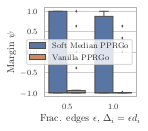

In [30]:
for (dataset, attack), df_group in (
    df_results[
        df_results.label.isin(labels_to_plot) 
        #& (df_results.initial_margin >= 0)
        & (df_results.epsilon.isin([0.5, 1]))
        & ((df_results.dataset != 'ogbn-products') | ~df_results.make_undirected.fillna(False))
        #   (
        #    (~df_results.make_undirected.fillna(False) & (df_results.label == 'Vanilla PPRGo'))
        #    | (df_results.make_undirected.fillna(True) & (df_results.label != 'Vanilla PPRGo'))
        #))
    ].groupby(['dataset', 'attack'])
):
    print(dataset, attack)
    
    df_group[architecture_c] = df_group['label'].apply(transform_label)
    hue_order = list(dict.fromkeys([
        transform_label(l) for l in labels_to_plot if l in df_group['label'].unique()
    ]).keys())
    
    print(df_group.groupby(architecture_c).epsilon.count())
    
    fig, ax = mpl_latex.newfig(width=0.30, ratio_yx=1)
    sns.boxplot(
        x=df_group.epsilon.rename(epsilons_c),
        y=df_group.margin,
        hue=df_group[architecture_c],
        hue_order=hue_order,
        fliersize=1
    )
    
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    
    plt.ylabel('')
    mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_boxplmargin_no_leglab', fig, close_fig=False)
    plt.ylabel(margin_c)
    
    mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_boxplmargin_no_legend', fig, close_fig=False)
    ax.legend(handles=handles, labels=labels)
    
    mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_boxplmargin', fig, close_fig=False)
    mpl_latex.dedicated_legend_plot(
        f'latex/assets/local_{attack}_{dataset}_boxplmargin_legend',
        mod_label=lambda l: l,
        ncol=3
    )
    
plt.gcf()

In [31]:
for (dataset, attack), df_group in (
    df_results[
        df_results.label.isin(labels_to_plot) 
        & (df_results.initial_margin >= 0)
        #& ((df_results.dataset != 'ogbn-products') | ~df_results.make_undirected.fillna(False))
        #   (
        #    (~df_results.make_undirected.fillna(False) & (df_results.label == 'Vanilla PPRGo'))
        #    | (df_results.make_undirected.fillna(True) & (df_results.label != 'Vanilla PPRGo'))
        #))
    ].groupby(['dataset', 'attack'])
):
    print(dataset, attack)
    
    df_group[architecture_c] = df_group['label'].apply(transform_label)
    hue_order = list(dict.fromkeys([
        transform_label(l) for l in labels_to_plot if l in df_group['label'].unique()
    ]).keys())
    
    print(df_group.groupby(architecture_c).epsilon.count())
    
    fig, ax = mpl_latex.newfig(width=0.30, ratio_yx=1)
    sns.boxplot(
        x=df_group.epsilon.rename(epsilons_c),
        y=df_group.initial_margin,
        hue=df_group[architecture_c],
        hue_order=hue_order,
        fliersize=1
    )
    
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    
    plt.ylabel('')
    mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_clean_boxplmargin_no_leglab', fig, close_fig=False)
    plt.ylabel(margin_c)
    
    mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_clean_boxplmargin_no_legend', fig, close_fig=False)
    ax.legend(handles=handles, labels=labels)
    
    mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_clean_boxplmargin', fig, close_fig=False)
    mpl_latex.dedicated_legend_plot(
        f'latex/assets/local_{attack}_{dataset}_clean_boxplmargin_legend',
        mod_label=lambda l: l,
        ncol=3
    )

citeseer LocalPRBCD
Architecture
Soft Median PPRGo    378
Vanilla GCN          411
Vanilla PPRGo        396
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


citeseer Nettack
Architecture
Soft Median PPRGo    378
Vanilla GCN          411
Vanilla PPRGo        396
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]
/nfs/homedirs/geisler/code/robust_gnns_at_scale/notebooks/mpl_latex.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figLegend = pylab.figure()
/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later;

cora_ml LocalPRBCD
Architecture
Soft Median PPRGo    378
Vanilla GCN          426
Vanilla PPRGo        417
Name: epsilon, dtype: int64
cora_ml Nettack
Architecture
Soft Median PPRGo    330
Vanilla GCN          426
Vanilla PPRGo        336
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


ogbn-papers100M LocalPRBCD
Architecture
Soft Median PPRGo    65
Vanilla PPRGo        20
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


ogbn-products LocalPRBCD
Architecture
Soft Median PPRGo    232
Vanilla PPRGo        116
Name: epsilon, dtype: int64


/nfs/staff-ssd/geisler/anaconda3/envs/rgnn_at_scale/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


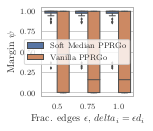

In [28]:
plt.gcf()

In [27]:
df_merged['dataset'].unique()

NameError: name 'df_merged' is not defined

# With recalculated PPR matrices

In [ ]:
pd.concat([pd.DataFrame(element) for element in df_evaluate['result.results'].tolist()], ignore_index=True).columns

In [ ]:
df_results.columns

In [ ]:
pd.concat([pd.DataFrame(element) for element in df_evaluate['result.results'].tolist()], ignore_index=True)

In [ ]:
df_merged = pd.merge(
    pd.concat([pd.DataFrame(element) for element in df_evaluate['result.results'].tolist()], ignore_index=True),
    df_results[df_results.label.isin(labels_to_plot) & (df_results.initial_margin >= 0)],
    on='original_id',
    suffixes=('', '_experiment')
)

In [ ]:
for (dataset, attack), df_group in (
    df_merged.groupby(['dataset', 'attack'])
):
    print(dataset, attack)
    
    df_group[architecture_c] = df_group['label'].apply(transform_label)
    hue_order = list(dict.fromkeys([
        transform_label(l) for l in labels_to_plot if l in df_group['label'].unique()
    ]).keys())
    
    fig, ax = mpl_latex.newfig(width=0.30, ratio_yx=1)
    sns.boxplot(
        x=df_group.epsilon.rename(epsilons_c),
        y=df_group.initial_margin,
        hue=df_group[architecture_c],
        hue_order=hue_order,
        fliersize=1
    )
    
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
    
    plt.ylabel('')
    mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_clean_boxplmargin_no_leglab', fig, close_fig=False)
    plt.ylabel(margin_c)
    
    mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_clean_boxplmargin_no_legend', fig, close_fig=False)
    ax.legend(handles=handles, labels=labels)
    
    mpl_latex.savefig(f'latex/assets/local_{attack}_{dataset}_clean_boxplmargin', fig, close_fig=False)
    mpl_latex.dedicated_legend_plot(
        f'latex/assets/local_{attack}_{dataset}_clean_boxplmargin_legend',
        mod_label=lambda l: l,
        ncol=3
    )

In [ ]:
plt.gcf()